# Introduction


## Problem Statement

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## Importing packages

In [28]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import rc

import seaborn as sns

from statsmodels.graphics.correlation import plot_corr

<a id="two"></a>
## Loading the Data

In [30]:
# importing datasets

train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

df_gscores = pd.read_csv("genome_scores.csv")

df_gtags = pd.read_csv("genome_tags.csv")

df_imdb = pd.read_csv("imdb_data.csv")

df_links = pd.read_csv("links.csv")

df_movies = pd.read_csv("movies.csv")

df_tags = pd.read_csv("tags.csv")

### Overview of the datasets

In [31]:
#Checking df_train dataset head
display(train.head())

#Checking df_train dataset information
train.info()

#Checking for null values
display(train.isnull().sum())

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [32]:
#Checking df_test dataset head
display(test.head())

#Checking df_test dataset information
test.info()

#Checking for null values
display(test.isnull().sum())

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


userId     0
movieId    0
dtype: int64

In [33]:
#Checking df_gscores dataset head
display(df_gscores.head())

#Checking df_gscores dataset information
df_gscores.info()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [34]:
#Checking df_gtags dataset head
display(df_gtags.head())

#Checking df_gtags dataset information
df_gtags.info()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [35]:
#Checking df_imdb dataset head
display(df_imdb.head())

#Checking df_imdb dataset information
df_imdb.info()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [36]:
#Checking df_links dataset head
display(df_links.head())

#Checking df_links dataset information
df_links.info()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [37]:
#Checking df_movies dataset head
display(df_movies.head())

#Checking df_movies dataset information
df_movies.info()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [38]:
#Checking df_tags dataset head
display(df_tags.head())

#Checking df_tags dataset information
df_tags.info()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


<a id="three"></a>
## Data Preprocessing

In [39]:
# Create a copy of the train data

train_copy = train.copy()

df_train = train_copy

In [40]:
# Create a copy of the train data

#test_copy = test.copy()

#df_test = test_copy[:10000]

### Merging datasets

In [41]:
# Merge the df_train and df_movies
df_merge = df_train.merge(df_movies, on='movieId')

#Checking df_merge dataset head
display(df_merge.head())

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


<a id="four"></a>
## Data Preprocessing

In [42]:
df_merge.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Which Way Home (2009)                 5.0
Kaakha Kaakha (2003)                  5.0
Not Quite Human II (1989)             5.0
Selling Isobel (2018)                 5.0
Sehar (2005)                          5.0
                                     ... 
Down and Out with the Dolls (2001)    0.5
The Informer (2019)                   0.5
Dough and Dynamite (1914)             0.5
Ideal Husband, An (1947)              0.5
Dopo quella notte (2010)              0.5
Name: rating, Length: 48151, dtype: float64

In [43]:
df_merge.groupby('title')['rating'].count().sort_values(ascending = False)

title
Shawshank Redemption, The (1994)         32831
Forrest Gump (1994)                      32383
Pulp Fiction (1994)                      31697
Silence of the Lambs, The (1991)         29444
Matrix, The (1999)                       29014
                                         ...  
Mniejsze zło (2009)                          1
Mixed Blood (1984)                           1
Mitä meistä tuli (2009)                      1
Mitch Albom's For One More Day (2007)        1
줄탁동시 (2012)                                  1
Name: rating, Length: 48151, dtype: int64

### Visualizing ratings

In [44]:
#Create a DataFrame and add the number of ratings to is using a count method
ratings_mean = pd.DataFrame(df_merge.groupby('title')['rating'].mean())
ratings_mean['# of ratings'] = df_merge.groupby('title')['rating'].count()
ratings_mean.head()

,rating,# of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


C:\Users\lucyz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='# of ratings', ylabel='Density'>

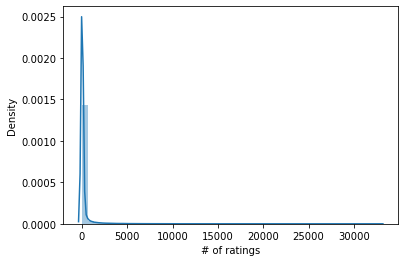

In [45]:
sns.distplot(ratings_mean['# of ratings'])

C:\Users\lucyz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

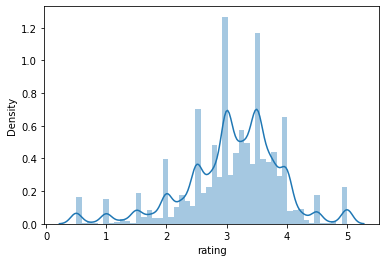

In [46]:
sns.distplot(ratings_mean['rating'])

#### The Relationship Between Average Rating and Number of Ratings

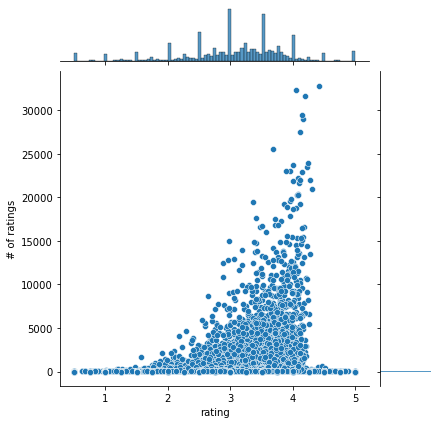

In [47]:
sns.jointplot(x = ratings_mean['rating'], y = ratings_mean['# of ratings'])

#### Recommender system

In [27]:
ratings_matrix = df_merge.pivot_table(index='userId',columns='title',values='rating')
star_wars_user_ratings = ratings_matrix['Return of the Jedi (1983)']
toy_story_user_ratings = ratings_matrix['Toy Story (1995)']

ValueError: Unstacked DataFrame is too big, causing int32 overflow

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [11]:
# Seperate features and tagret variables
#tweet_id = df_test.tweetid.values 
X = df_train.drop(['rating','timestamp'], axis=1)
y = df_train['rating']

# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
regressor = RandomForestRegressor(n_estimators = 600, random_state = 42)

In [13]:
# create targets and features dataset
regressor.fit(X_train,y_train)

preds = regressor.predict(X_test)

In [14]:
# create one or more ML models
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, preds))

In [15]:
# evaluate one or more ML models
rmse(y_test, preds)

1.0931384528427006